In [3]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import factorial

In [16]:
def _plot(k, errs):
    plt.figure(figsize=(12, 8))
    
    plt.plot(k, errs)
    plt.xlabel("k")
    plt.ylabel("RMSE")
    plt.grid(linestyle='--', color='gray', alpha=0.5)
    plt.xticks(np.arange(0, k.shape[0] + 1, 10))


def plot_err(n_samples, sample_size, k_max, distribution):
    sampler = getattr(np.random, distribution)
    
    x = sampler(size=(n_samples, sample_size))        
    k = np.arange(1, k_max + 1)
    
    k_3d = k[:, None, None]
    if distribution == "uniform":
        thetas = np.power(np.power(x, k_3d).mean(axis=2).T * (k + 1), 1 / k)
    else:
        thetas = np.power(np.power(x, k_3d).mean(axis=2).T / factorial(k), 1 / k)
    
    errs = np.mean((thetas.T - 1)**2, axis=1)
    _plot(k, errs)

# Uniform distribution

Пусть у нас есть выборка $X_{(n)} = (X_1, X_2, \cdots, X_n)$. Посчитаем оценку $\theta^*$ для равномерного распределения $U[0, \theta]$ с помощью метода моментов:

$$
E[X_i^{k}] = \int_{0}^{\theta} x^{k} f(x) dx = \int_{0}^{\theta} x^{k} \frac{1}{\theta} dx = \frac{x^{k + 1}}{k + 1} \frac{1}{\theta} \Big|_0^\theta = \frac{\theta^{k}}{k + 1} \Rightarrow \theta = ((k + 1) E[X_i^k])^{\frac{1}{k}} \Rightarrow \theta^* = ((k + 1) \overline{X_i}^k)^{\frac{1}{k}}
$$

Ошибку для оценки будем считать для истинного значения $\theta = 1$ т.к. любая другая получается масштабированием из стандартного. Посчитаем эмпирический $k$-тый момент для 1к выборок, каждая размером 1к. Далее, посчитаем $RMSE = \sqrt{\frac{1}{N} \sum_{1}^{n} (1 - \theta_i^*)^2}$ и построим график. 

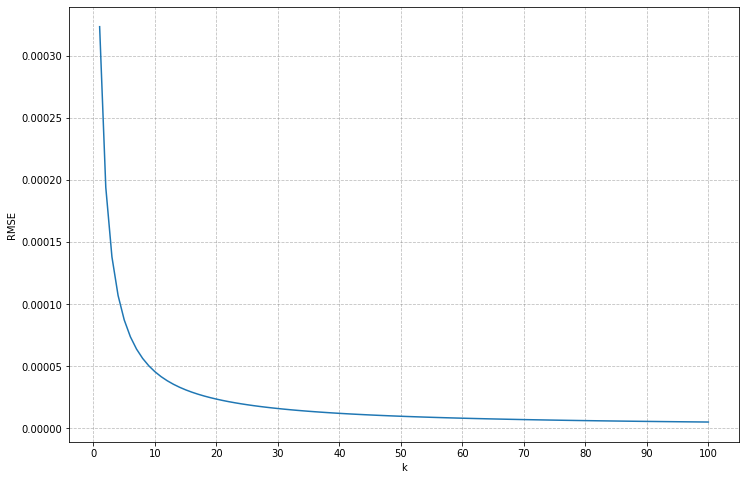

In [13]:
plot_err(n_samples=1000, sample_size=1000, k_max=100, distribution="uniform")

Из графика видно, что при увеличении $k$ наша оценка улучшается. Можно предполагать, что мы не найдем лучший из возможных $k$, т.к. ошибка будет стремиться к нулю и всегда найдется оценка лучше (это, кажется, даже доказывается у Черновой). 

# Exponential distribution

Посчитаем оценку для экспоненциального распределения, где плотность определим как $f(x) = \frac{1}{\theta} e^{\frac{-x}{\theta}}, x \geq 0$:
    
$$
E[X_i^k] = \int_{0}^{\infty} x f(x) dx = \int_{0}^{\infty} x \frac{1}{\theta} e^{\frac{-x}{\theta}} dx = \left[ \begin{aligned} t & = \frac{x}{\theta} \\ x & = \theta t\\ dt & = \frac{1}{\theta}dx \end{aligned}\; \right] =
\theta^k \int_{0}^{\infty} t^k e^{-t}dt = \theta^k \Gamma(k + 1) = \theta^k k! \Rightarrow \theta = \sqrt[k]{\frac{E[X_i^k]}{k!}} \Rightarrow \theta^* = \sqrt[k]{\frac{\overline{X}_i^k}{k!}}
$$

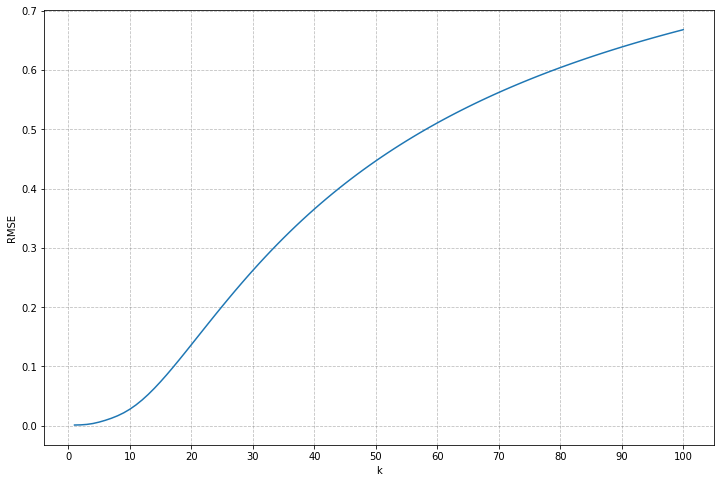

In [17]:
plot_err(n_samples=1000, sample_size=1000, k_max=100, distribution="exponential")

В отличие от непрерывного распределения, лучшая оценка получается при $k = 1$, а далее среднеквадратичная ошибка возрастает.